## FNN2: Fully Connected Neural Network - Every Neuron Connected to Next Layer (Accuracy Improvement)

### Goal: Improve the Accuarcy! (Acomplished 3/12)

#### Structure: Experimenting with different parameters to improve the success of this model.

### 0. Imports

In [25]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch import optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

### 1. Read Data

In [26]:
mushroom_data = pd.read_csv('raw_data/mushroom_cleaned.csv')
mushroom_data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


### 2. Prepare Data

In [27]:
X = mushroom_data.drop(columns=['class'])
y = mushroom_data['class']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [30]:
# convert to tensors
X_train_tensor = torch.tensor(X_train, dtype = torch.float32)
X_test_tensor = torch.tensor(X_test, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train, dtype = torch.float32)
y_test_tensor = torch.tensor(y_test, dtype = torch.float32)

### 3. Create NN

#### 3.1: Three Layer

In [32]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_dimensions, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 8)
        self.fc2 = nn.Linear(8, 8)
        self.fc3 = nn.Linear(8, 8)
        self.output_layer = nn.Linear(8, 1)


    # feedforward function
    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = torch.relu(x)
        x = self.output_layer(x)
        return x

### 3. Train Model

#### 3.1: Three Layer Model

In [34]:
# variables needed
input_size = X_train.shape[1]
hidden_dimensions = 8
output_size = len(set(y))

# initialize model
model = NeuralNetwork(input_size, hidden_dimensions, output_size)

# loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), 0.001)

# number of training loops
epochs = 5000

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    output = model(X_train_tensor)


    y_train_tensor = y_train_tensor.view(-1, 1)
    loss = criterion(output, y_train_tensor)

    loss.backward()

    optimizer.step()
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            model.eval()

            outputs = model(X_train_tensor)
            probabilities = torch.sigmoid(outputs)

            predictions = (probabilities > 0.5).float()

            accuracy = (y_train_tensor.flatten() == predictions.flatten()).float().mean()

            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item()* 100:.2f}%')
        


Epoch [10/5000], Loss: 11.6604, Accuracy: 55.00%
Epoch [20/5000], Loss: 6.0385, Accuracy: 55.10%
Epoch [30/5000], Loss: 1.7828, Accuracy: 50.91%
Epoch [40/5000], Loss: 1.4304, Accuracy: 47.09%
Epoch [50/5000], Loss: 0.7249, Accuracy: 44.53%
Epoch [60/5000], Loss: 0.7946, Accuracy: 46.54%
Epoch [70/5000], Loss: 0.7344, Accuracy: 49.85%
Epoch [80/5000], Loss: 0.6964, Accuracy: 53.49%
Epoch [90/5000], Loss: 0.6831, Accuracy: 53.81%
Epoch [100/5000], Loss: 0.6767, Accuracy: 54.34%
Epoch [110/5000], Loss: 0.6733, Accuracy: 55.73%
Epoch [120/5000], Loss: 0.6703, Accuracy: 55.79%
Epoch [130/5000], Loss: 0.6682, Accuracy: 56.31%
Epoch [140/5000], Loss: 0.6664, Accuracy: 56.90%
Epoch [150/5000], Loss: 0.6649, Accuracy: 57.00%
Epoch [160/5000], Loss: 0.6635, Accuracy: 57.40%
Epoch [170/5000], Loss: 0.6623, Accuracy: 57.84%
Epoch [180/5000], Loss: 0.6612, Accuracy: 58.05%
Epoch [190/5000], Loss: 0.6602, Accuracy: 58.26%
Epoch [200/5000], Loss: 0.6593, Accuracy: 58.49%
Epoch [210/5000], Loss: 0.65

### 4. Evaluation

In [35]:
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    
    probabilities = torch.sigmoid(outputs)

    predictions = (probabilities > 0.5).float()

    accuracy = (y_test_tensor.flatten() == predictions.flatten()).float().mean()

print(f"Accuracy: {accuracy.item()* 100:.2f}%")

Accuracy: 67.29%


### 5. Weight Investigation

In [36]:
# dictionary to hold names and weights associated with each layer
model_dict = {"name":[], "weights":[]}

for name, param in model.state_dict().items():
    model_dict["name"].append(name)
    model_dict["weights"].append(param.data.numpy())
    print("Name:", name,"\nWeights:",param.data)

Name: fc1.weight 
Weights: tensor([[-4.1740e-02, -6.5952e-01, -2.3407e-01,  1.4032e-01,  1.2635e+00,
          2.4408e-01, -8.8655e-02, -1.2027e+00],
        [ 6.1246e-03,  4.1157e-02,  2.5739e+00,  1.4312e-02, -1.5551e+00,
         -1.6311e-01,  8.3591e-01, -3.1074e-01],
        [ 1.6464e-02,  8.3396e-01,  9.5191e-01, -1.5408e-01,  1.5438e+00,
         -1.7891e-02, -4.1693e-01,  1.7427e-01],
        [-5.3990e-02,  4.7900e-01,  1.4236e-01, -7.4710e-02, -1.2698e+00,
          3.2527e-01, -6.8204e-02,  1.4213e+00],
        [-2.9122e-01,  2.4242e-01, -2.6607e-01, -1.1165e-01, -9.6354e-02,
         -1.7133e-01, -1.7467e-01,  1.1571e-01],
        [ 1.3296e-01,  1.2563e+00,  2.5397e+00, -2.7502e-01, -2.7459e+00,
         -1.3889e-01, -4.6613e-01, -1.6101e+00],
        [-3.1712e-01, -1.8201e-02,  7.9510e-02, -7.9653e-02, -1.9817e-01,
         -2.7126e-02, -6.4729e-03,  7.5549e-02],
        [-2.7119e-02, -4.3458e-02,  1.1058e+00, -2.2323e-01,  1.0867e+00,
          2.3987e-03, -2.6100e-01,  4.

In [37]:
model_dict

{'name': ['fc1.weight',
  'fc1.bias',
  'fc2.weight',
  'fc2.bias',
  'fc3.weight',
  'fc3.bias',
  'output_layer.weight',
  'output_layer.bias'],
 'weights': [array([[-4.17404361e-02, -6.59524977e-01, -2.34067693e-01,
           1.40320316e-01,  1.26347125e+00,  2.44078025e-01,
          -8.86550397e-02, -1.20273101e+00],
         [ 6.12455979e-03,  4.11573537e-02,  2.57389259e+00,
           1.43120615e-02, -1.55507648e+00, -1.63109913e-01,
           8.35909367e-01, -3.10744107e-01],
         [ 1.64640527e-02,  8.33961487e-01,  9.51913178e-01,
          -1.54081807e-01,  1.54379475e+00, -1.78908687e-02,
          -4.16930705e-01,  1.74269676e-01],
         [-5.39902039e-02,  4.78999078e-01,  1.42364696e-01,
          -7.47104511e-02, -1.26978612e+00,  3.25270236e-01,
          -6.82041943e-02,  1.42134535e+00],
         [-2.91224718e-01,  2.42421061e-01, -2.66073942e-01,
          -1.11654505e-01, -9.63538885e-02, -1.71328917e-01,
          -1.74671754e-01,  1.15707844e-01],
       

### 6. Next Steps

In [38]:
# look into visualizing the transformation of the weights over each layer
# also look into the transformation over each epoch
# visualize with box plots 

### 6. Visualization

In [39]:
# plotting the weights of the first neural network with one layer
# plot each neuron
# plot each layer


#### 6.1: Three Layer Network

##### 6.1a: Three Layer NN Weights by Feature

Text(0, 0.5, 'Weight Value')

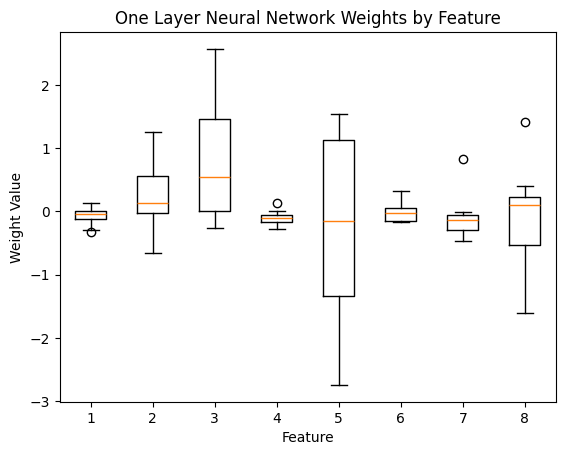

In [40]:
feature_boxplot_dict = {"boxes":[]}
for i in range(len(model_dict["weights"][0])):
    feature_boxplot_dict["boxes"].append(list(model_dict["weights"][0][:,i]))
bias = list(model_dict["weights"][1])
plt.boxplot(feature_boxplot_dict["boxes"])
plt.title("One Layer Neural Network Weights by Feature")
plt.xlabel("Feature")
plt.ylabel("Weight Value")

##### 6.1b: Three Layer NN Weights by Neuron

Text(0, 0.5, 'Weight Value')

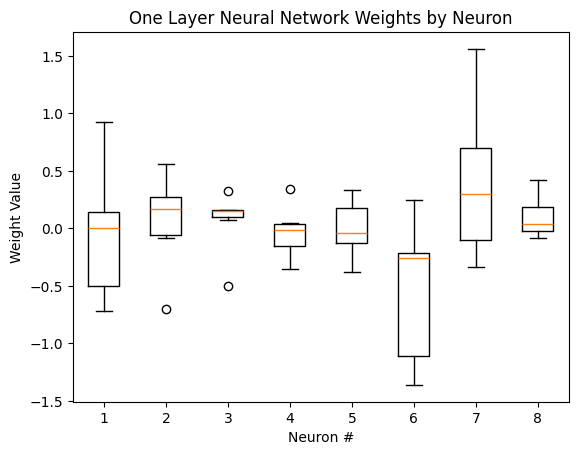

In [104]:
neuron_boxplot_dict = {"boxes":[]}
for i in range(len(model_dict["weights"][0])):
    neuron_boxplot_dict["boxes"].append(list(model_dict["weights"][0][i]))
bias = list(model_dict["weights"][1])
plt.boxplot(neuron_boxplot_dict["boxes"])
plt.title("One Layer Neural Network Weights by Neuron")
plt.xlabel("Neuron #")
plt.ylabel("Weight Value")

#### 6.1c: Three Layer NN Weights by Layer
##### Here, we should have three eight subplots, each with three boxplots to show distribution 